Zebra Puzzle斑马拼图 游戏规则
1. 有五栋房子。
There are five houses.
2. 英国人住在红房子里。The Englishman lives in the red house.
3. 西班牙人拥有这只狗。The Spaniard owns the dog.
4. 咖啡在温室里喝。Coffee is drunk in the green house.
5. 乌克兰人喝茶。The Ukrainian drinks tea.
6. 绿色房子紧邻象牙色房子的右侧。The green house is immediately to the right of the ivory house.
7. 老金吸烟者拥有蜗牛。The Old Gold smoker owns snails.
8. 库尔在黄色房子里熏。Kools are smoked in the yellow house.
9. 中屋喝牛奶。Milk is drunk in the middle house.
10. 挪威人住在第一所房子里。The Norwegian lives in the first house.
11. 抽切斯特菲尔德烟的人住在养狐狸的人旁边的房子里。The man who smokes Chesterfields lives in the house next to the man with the fox.
12. 养马的房子旁边的一间房子里正在抽烟。Kools are smoked in a house next to the house where the horse is kept.
13. 好彩吸烟者喝橙汁。The Lucky Strike smoker drinks orange juice.
14. 日本人对议会抽烟。The Japanese smokes Parliaments.
15. 挪威人住在蓝房子旁边。The Norwegian lives next to the blue house.

谁喝水？ 斑马的主人是谁？Who drinks water? Who owns the zebra?

每栋房子都漆成不同的颜色，里面的居民来自不同的国籍，拥有不同的宠物，喝不同的饮料，抽不同品牌的美国香烟。
Each house is painted a different color, and their inhabitants are of different nationalities, own different pets, drink different beverages and smoke different brands of American cigarettes.


In [12]:
import itertools

def imright(h1, h2):
    "House h1 is immediately right of h2 if h1-h2 == 1."
    return h1 - h2 == 1

def nextto(h1, h2):
    "Two houses are next to each other if they differ by 1."
    return abs(h1 - h2) == 1

counts = 0

def zebra_puzzle():
    houses = first, _, middle, _, _ = [1, 2, 3, 4, 5]
    orderings = list(itertools.permutations(houses))

    return next((WATER, ZEBRA)
                for (red, green, ivory, yellow, blue) in c(orderings)
                if imright(green, ivory)
                for (Englishman, Spaniard, Ukranian, Japanese, Norwegian) in c(orderings)
                if Englishman is red
                if Norwegian is first
                if nextto(Norwegian, blue)
                for (coffee, tea, milk, oj, WATER) in c(orderings)
                if coffee is green
                if Ukranian is tea
                if milk is middle
                for (OldGold, Kools, Chesterfields, LuckyStrike, Parliaments) in c(orderings)
                if Kools is yellow
                if LuckyStrike is oj
                if Japanese is Parliaments
                for (dog, snails, fox, horse, ZEBRA) in c(orderings)
                if Spaniard is dog
                if OldGold is snails
                if nextto(Chesterfields, fox)
                if nextto(Kools, horse)
                )


import time

"""
## 延迟执行
"""
def timedcall(fn, *args):
    "Call function with args; return the time in seconds and result."
    t0 = time.time()
    result = fn(*args)
    t1 = time.time()
    return f'{t1 - t0:.5f}', result

timedcall(zebra_puzzle)

('0.00103', (1, 5))

# 切面
Aspect-oriented(AOP 考虑程序的正确，效率，DEBUG,这部分代码不穿插在主体，存在别处
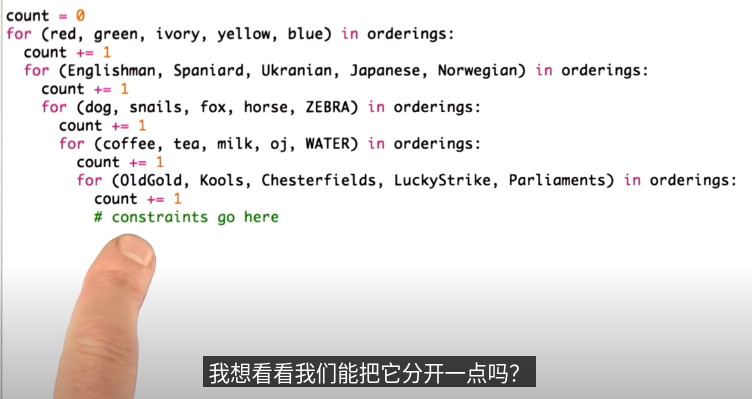

In [25]:
# 生成器
def ints(start,end=None):
    while end is None or start <= end :
        yield start
        start +=1

def all_ints():
    yield 0
    for n in ints(1):
        yield n
        yield -n
        
a = all_ints()
next(a),next(a),next(a),next(a)

(0, 1, -1, 2)

In [199]:

def average(numbers):
    "Return the average (arithmetic mean) of a sequence of numbers."
    return sum(numbers) / float(len(numbers))


def timedcalls(n, fn, *args):
    """Call fn(*args) repeatedly: n times if n is an int, or up to
    n seconds if n is a float; return the min, avg, and max time"""
    # Your code here.

    if isinstance(n, int):
        times = [timedcall(fn, *args)[0] for _ in range(n)]
    else:
        times = []
        while sum(times) < n:
            times.append(timedcall(fn, *args)[0])

    return min(times), average(times), max(times)

"""
妙
"""
def c(iterable):
    c.starts +=1
    for x in iterable:
        c.items +=1
        yield x


def instrument_fn(fn,*args):
    c.starts,c.items = 0,0
    result = fn(*args)
    print(f'{fn.__name__} got {result} with {c.starts:0=8,} iters orver {c.items:,} items.')

instrument_fn(zebra_puzzle)

zebra_puzzle got (1, 5) with 0,000,025 iters orver 2,775 items.


## 总结
- Concept inventory。我们学习了我们构造1个概念清单的方式。
- Refine ideas。改善想法。
- Simple implementation。选择我们可以想出的最简单的实现。
- back envelope。在信封背面估算，说明运行这个简单的实现，将花多久时间。
- Refine code。必要时，改善代码，通过交换一些从句，使它更快。
- tools。我们也学习了构建工具的想法。我们为timing计时和counts计数构建了工具。
- aspect。总的来说，我们学习了从程序的切面分离的想法，尽可能地尝试保持设计得干净(clean)，以便你能够保证，what was working on getting the problem right and what was working on making it more efficient。

# cryptarithmetic
ODD+ODD=EVEN, 每个字母代表的数字
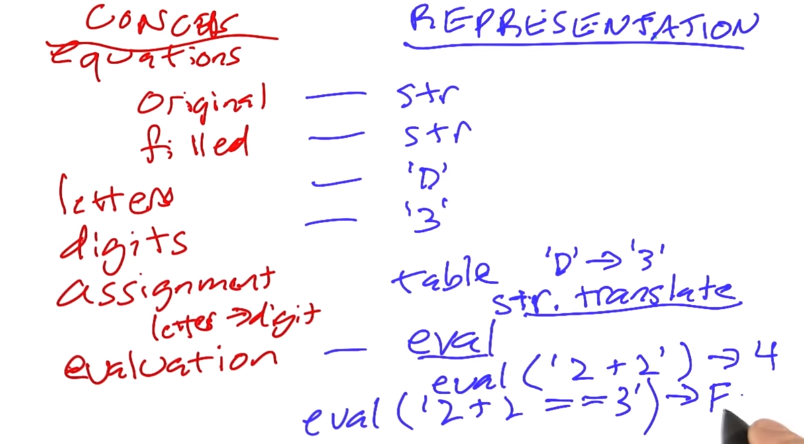
___
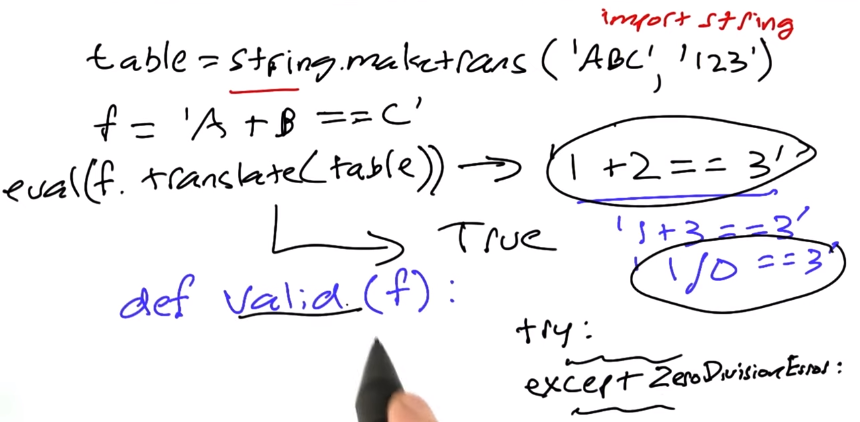
___
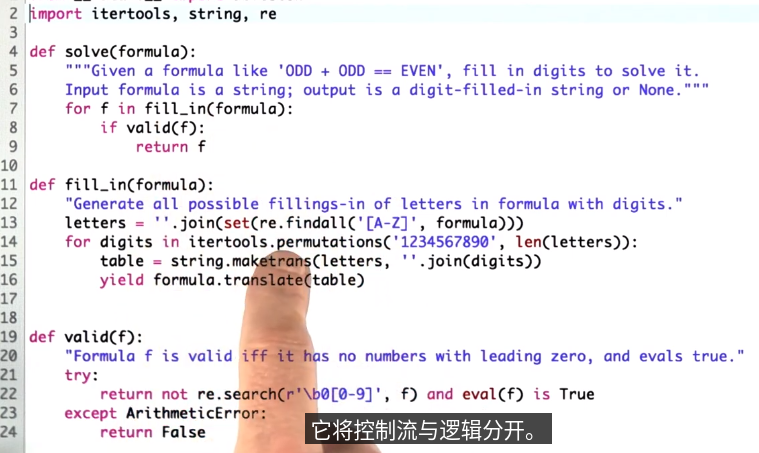

In [29]:
table = 'abc'.maketrans('abc','123')
'abcd'.translate(table)

'123d'

In [51]:
import re 

def solve(formula):
    """Given a formula like 'ODD + ODD == EVEN', fill in digits to solve it.
    Input formula is a string; output is a digit-filled-in string or None."""
    # Your code here
    for f in fill_in(formula):
        if valid(f):return f
    
def fill_in(formula):
    "Generate all possible fillings-in of letters in formula with digits."
    letters = ''.join(set(re.findall(r'[A-Z]',formula)))#should be a string
    for digits in itertools.permutations('1234567890', len(letters)):
        table = str.maketrans(letters, ''.join(digits))
        yield formula.translate(table)
    
def valid(f):
    """Formula f is valid if and only if it has no 
    numbers with leading zero, and evals true."""
    try: 
        return not re.search(r'\b0[0-9]', f) and eval(f) is True
    except ArithmeticError:
        return False

In [58]:
examples = """TWO + TWO == FOUR
A**2 + B**2 == C**2
A**2 + BE**2 == BY**2
X / X == X
A**N + B**N == C**N and N > 2
ATOM**0.5 == A + TO + M
GLITTERS is not GOLD
ONE < TWO and FOUR < FIVE
ONE < TWO < THREE
RAMN == R**3 + RM**3 == N**3 + RX**3
sum(range(AA)) == BB
sum(range(POP)) == BOBO
ODD + ODD == EVEN
PLUTO not in set([PLANETS])""".splitlines()

def test():
    t0 = time.time()
    for example in examples:
        print(12*' ', example)
        print('%s sec: %s ' % timedcall(solve, example))
    print('%6.4f tot.' % (time.time()-t0))

test()

             TWO + TWO == FOUR
0.33123 sec: 734 + 734 == 1468 
             A**2 + B**2 == C**2
0.00153 sec: 3**2 + 4**2 == 5**2 
             A**2 + BE**2 == BY**2
0.01746 sec: 5**2 + 12**2 == 13**2 
             X / X == X
0.00002 sec: 1 / 1 == 1 
             A**N + B**N == C**N and N > 2
0.05732 sec: None 
             ATOM**0.5 == A + TO + M
0.00453 sec: 1296**0.5 == 1 + 29 + 6 
             GLITTERS is not GOLD
0.00006 sec: 47355862 is not 4179 
             ONE < TWO and FOUR < FIVE
0.00003 sec: 148 < 571 and 3196 < 3208 
             ONE < TWO < THREE
0.00002 sec: 126 < 351 < 37466 
             RAMN == R**3 + RM**3 == N**3 + RX**3


<string>:1: SyntaxWarning: "is not" with a literal. Did you mean "!="?


0.31860 sec: 1729 == 1**3 + 12**3 == 9**3 + 10**3 
             sum(range(AA)) == BB
0.00010 sec: sum(range(11)) == 55 
             sum(range(POP)) == BOBO
0.00999 sec: sum(range(101)) == 5050 
             ODD + ODD == EVEN
0.12701 sec: 655 + 655 == 1310 
             PLUTO not in set([PLANETS])
0.00004 sec: 76941 not in set([7653842]) 
0.8683 tot.


In [59]:
import cProfile
def test():solve('TWO + TWO == FOUR')
cProfile.run('test()')

# 可以看出eval非常耗时，执行次数越多越耗时

         453212 function calls in 0.462 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
    46329    0.038    0.000    0.090    0.000 1080369550.py:10(fill_in)
    46328    0.023    0.000    0.360    0.000 1080369550.py:17(valid)
        1    0.020    0.020    0.469    0.469 1080369550.py:3(solve)
        1    0.000    0.000    0.469    0.469 649715790.py:2(test)
        1    0.000    0.000    0.000    0.000 <string>:1(<module>)
    46328    0.020    0.000    0.083    0.000 re.py:197(search)
        1    0.000    0.000    0.000    0.000 re.py:232(findall)
    46329    0.019    0.000    0.028    0.000 re.py:288(_compile)
    36248    0.247    0.000    0.254    0.000 {built-in method builtins.eval}
        1    0.000    0.000    0.469    0.469 {built-in method builtins.exec}
    46329    0.009    0.000    0.009    0.000 {built-in method builtins.isinstance}
        1    0.000    0.000    0.000    0.000 {built-in method builti

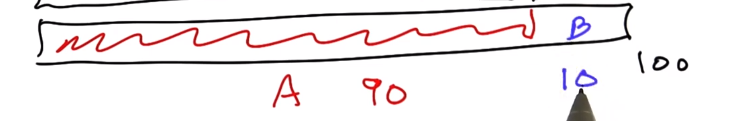
- B提高10倍-9秒 不如A提高一倍-45秒
- eval耗时 选择 
 - ~~编辑它(如果可以)~~ 
 - ~~更容易地调用~~
 - 减少调用次数

In [61]:
def compile_word(word):
    if word.isupper():
        terms = [('%s*%s' % (10**i, d)) # 格式化i和d
                 for (i, d) in enumerate(word[::-1])] # 反序
        return '(' + '+'.join(terms) + ')'
    else:
        return word
word='YOU'
compile_word(word)

'(1*U+10*O+100*Y)'

In [67]:
# 编译单词，减少eval 提升速度
def faster_solve(formula):
    f,letters = compile_formula(formula)
    for digits in itertools.permutations((1,2,3,4,5,6,7,8,9,0),len(letters)):
        try:
            if f(*digits) is True:
                table = str.maketrans(letters,''.join(map(str,digits)))
                return formula.translate(table)
        except ArithmeticError:
            pass

def compile_formula(formula,verbose=False):
    """ compile formula into a function 
    'YOU == ME**2' 
    return:
    (lambda Y, M, E, U, O: (U+10*0+100*Y) == (E+10*M)**2), 'YMEUO'
    """
    # ODEVN
    letters = ''.join(set(re.findall(r'[A-Z]', formula)))
    # 排除0前导 找出字母
    first_letters = set(re.findall(r'\b([A-Z])[A-Z]+',formula))
    # [O,D,E,V,N]
    params = ', '.join(letters)
    # ['', 'ODD', '+', 'ODD', '==', 'EVEN', '']
    tokens = map(compile_word,re.split(r'([A-Z]+)',formula))
    # (O*100+D*10+D*1)+(O*100+D*10+D*1)==(E*1000+V*100+E*10+N*1)
    # if E !=0 and O != 0:
    test = ' and '.join(f'{x}!=0' for x in first_letters)
    print(first_letters,test)
    body = ''.join(tokens)
    f = f'lambda {params}:{test} and {body}'
    if verbose:print(f)
    return eval(f),letters

In [68]:
import cProfile
def test():faster_solve('TWO + TWO == FOUR')
cProfile.run('test()')

{'T', 'F'} T!=0 and F!=0
         46419 function calls (46416 primitive calls) in 0.036 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.036    0.036 131830641.py:2(test)
        7    0.000    0.000    0.000    0.000 2618614576.py:1(compile_word)
        3    0.000    0.000    0.000    0.000 2618614576.py:3(<listcomp>)
        1    0.000    0.000    0.000    0.000 9768437.py:12(compile_formula)
        1    0.011    0.011    0.036    0.036 9768437.py:2(faster_solve)
        3    0.000    0.000    0.000    0.000 9768437.py:28(<genexpr>)
    46328    0.024    0.000    0.024    0.000 <string>:1(<lambda>)
        1    0.000    0.000    0.036    0.036 <string>:1(<module>)
        1    0.000    0.000    0.000    0.000 iostream.py:202(schedule)
        4    0.000    0.000    0.000    0.000 iostream.py:429(_is_master_process)
        4    0.000    0.000    0.000    0.000 iostream.py:448(_schedule_flu

# 练习 
- 字符串中最大的回文
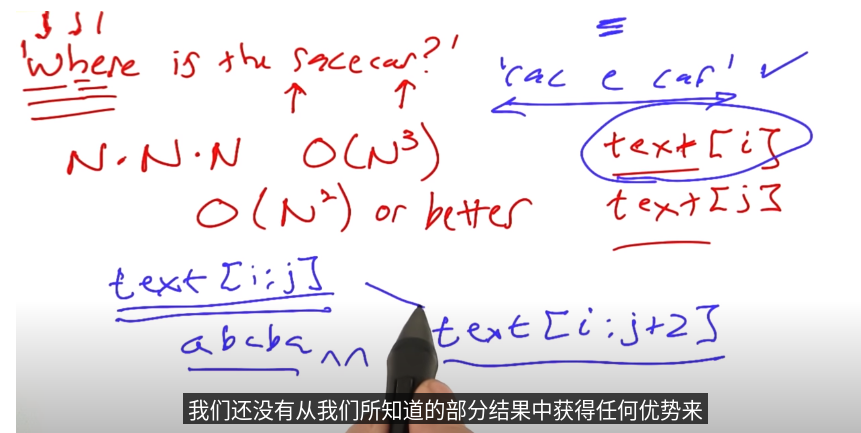
如果从两边向中央的检查 复杂度N个开始N个结束 每个字符串N个子字符串 $O(N^3)$

- 从中心向两边生长直到不是回文

In [183]:
def longest_subpalindrome_slice(text):
    def length(slice):a,b = slice;return b-a
    
    if text == '':return (0,0)
    text = text.upper()
    l = len(text)
    iters = [grow(start,end,text) 
             for start in range(l) 
             for end in (start,start+1)]
    return max(iters,key=length)

def grow(i,j,text):
    """
    text[i-1]==text[j] 迷惑
    text[i]==text[j+1] 不行？
    """
    # 左侧等于右侧 'aa' 1,1
    while (i>0 and j<len(text)
          and text[i-1]==text[j]):
        i-=1
        j+=1
    return i,j

def test():
    L = longest_subpalindrome_slice
    assert L('racecar') == (0, 7)
    assert L('Racecar') == (0, 7)
    assert L('RacecarX') == (0, 7)
    assert L('Race carr') == (7, 9)
    assert L('') == (0, 0)
    assert L('something rac e car going') == (8,21)
    assert L('xxxxx') == (0, 5)
    assert L('Mad am I ma dam.') == (0, 15)
    return 'tests pass'

print(test())

tests pass


In [197]:
eval('lambda x:eval(x)')('print("hello")')

hello
